**4.5. 규제가 있는 선형 모델**
모델 규제
- 과대적합을 감소시키는 좋은 방법
- 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것임
- 선형 회귀 모델을 규제하는 방법은 모델의 가중치를 제한함으로써 규제를 가함
- 선형 회귀 모델 규제 방법
  - 릿지 회귀
  - 라쏘 회귀
  - 엘라스틱넷

4.5.1. 릿지 회귀
- 규제가 추가된 선형 회귀 버전으로, 규제항이 비용함수에 추가됨
- 학습 알고리즘을 데이터에 맞추는 것 뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 함
- 규제항은 훈련하는 동안에만 비용 추가될 수 있고, 훈련이 끝나면 모델의 성능을 규제가 없는 성능지표로 평가함
- 릿지 회귀의 하이퍼 파라미터
  - $\alpha$: 모델을 얼마나 많이 규제할지 조절하는 하이퍼파라미터
    - $\alpha = 0$ : 릿지 회귀가 선형 회귀와 같아짐
    - $\alpha$가 충분히 큰 경우: 모든 가중치가 거의 0에 가까워지고, 데이터의 평균을 지나는 수평선이됨
- 릿지 회귀의 비용 함수
$$J(\theta) = MSE(\theta) + \alpha{{1}\over{2}}\sum_{i=1}^{n} \theta_{i}^{2}$$
  - 편향을 나타내는 $\theta_{0}$는 규제되지 않으므로 1에서 시작함
- 릿지 회귀에서 경사하강법을 적용하기 위해선 MSE 그레디언트 벡터에 $\alpha w$를 곱하면 됨   
  - 여기서 w는 가중치 벡터로 정의
  - $\alpha$를 증가시킬수록 직선에 가까워지는 것을 확인 가능 -> 모델의 분산을 줄지만 편향이 커지는 것을 확인 가능
- 선형 회귀와 마찬가지로 릿지 회귀를 계산할 때 정규방적식과 경사하강법을 모두 사용 가능
  - 사이킷런에서 정규방적식을 사용한 릿지 회귀를 적용하는 예시

In [21]:
import numpy as np
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X **2 + X + 2 + np.random.randn(m,1)

In [22]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha =1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([5.05340004])

  - 사이킷런에서 확률적 경사 하강법을 사용한 예시

In [23]:
from sklearn.linear_model import SGDRegressor
sgd_leg = SGDRegressor(penalty="l2")  # penalty를 이용해 사용할 규제를 지정
sgd_leg.fit(X, y.ravel())
sgd_leg.predict([[1.5]])

array([5.03009227])

4.5.2. 라쏘 회귀
- 릿지 회귀와 동일하게 선형 회귀의 또 다른 규제된 버전
- 릿지 회귀와 마찬가지로 비용 함수에 규제항을 더하나, 가중치 벡터의 $l_{1}$노름을 사용
- 라쏘 회귀의 비용함수
$$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}{|\theta_{i}|}$$
- 라쏘 회귀의 특징
  - 덜 중요한 특성의 가중치를 제거하려는 특징이 존재(중요하지 않은 특성의 가중치를 0으로 만듦)
    - 자동으로 특성을 선택하고 희소 모델을 형성함 (0이 아닌 특성의 가중치가 적음)
  - 라쏘의 비용함수는 $\theta_{i} = 0$인 경우 미분 가능하지 않음
    - 하지만 $\theta_{i} = 0$일 때 서브그레디언트 벡터인 $g$를 이용하면 경사하강법을 적용 가능함
    - Lasso 클래스를 이용한 사이킷런 예시

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)  # lasso 대신 SGDRegressor(penalty = "l1")을 이용할 수 있음
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.9972025])

4.5.3. 엘라스틱넷
- 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항은 릿지와 회귀의 규제항을 단순히 더하여 사용하고, 혼합 정도는 혼합 비율인 r을 사용하여 조절
  - $r=0$이면 엘라스틱넷은 릿지회귀와 같아짐
  - $r=1$이면 엘라스틱넷은 라쏘회귀와 같아짐
- 엘라스틱넷의 비용 함수
$$J(\theta) = MSE(\theta) +r\alpha\sum|theta_{i}| + {{1-r}\over{2}} \alpha \sum_{i=1}^{n}\theta_{i}^{2}$$

**선형 회귀 모델인 릿지, 라쏘, 엘라스틱넷을 사용하는 경우
- 일반적인 선형 회귀보단, 규제가 약간은 존재하는 모델을 선호
- 릿지가 기본적으로 쓰이나, 쓰이는 특성이 몇 가지만 존재한다면 라쏘나 엘라스틱넷을 사용하는 것이 좋음
  - 불필요한 특성의 가중치를 0으로 만들기 때문
- 특성 수가 훈련 샘플 수보다 많거나 특성 몇가지가 강하게 연관되어 있는 경우 보통 라쏘보단 엘라스틱넷을 선호함
- 엘라스틱넷을 사용한 예시

In [25]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.99966034])

4.5.4. 조기 종료
- 경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 방법으로, 검증 에러가 최솟값에 도달하면 바로 훈련을 중지하는 방법
- 확률적 경사 하강법이나 미니배치 경사하강법에서는 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인하기 어려움
  - 검증 에러가 일정 시간 동안 최솟값보다 큰 경우(모델이 더 나아지지 않는 경우) 학습을 멈추고 검증 에러가 최소일 때로 되돌아가는 방식을 체택함
- 조기 종료 예시

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

#데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
bast_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # 훈련을 이어서 진행합니다.
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

**4.6. 로지스틱 회귀**

로지스틱 회귀
- 샘플이 특정 클래스에 속할 확률을 추정하는데 사용
- 이를 이진 분류기를 사용하여 추정
  - 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측 -> 레이블이 1인 양성 클래스에 속한다고 생각
  - 넘지 않으면 클래스에 속하지 않는다고 예측 -> 레이블이 0인 음성 클래스에 속함


4.6.1. 확률 추정
- 선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산한 후, 편향을 더함
- 이후 선형 회귀와 같이 바로 결과를 출력하는 것이 아닌, 결과값의 로지스틱을 출력함
  - 0과 1 사이의 값을 출력 -> 시그모이드 함수라고 함 (S자 형태를 띰)

4.6.2. 훈련과 비용 함수
- 로지스틱 회귀 모델의 훈련 목적
  - 양성 샘플에 대해 높은 확률을 추정하고 음성 샘플에 대해 낮은 확률을 추정하는 모델 파라미터 벡터 $\theta$를 찾고자 함
  - 비용함수는 -log로 정의되기 때문에 입력 변수가 0에 가까울 수록 값이 커져 타당하다 할 수있음 -> 즉 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가하게 됨
  - 반대로 입력 변수가 1에 가까우면 값은 0에 가까워짐
    - 음성 샘플의 확률을 0에 가깝게 추정하거나 양섬 샘플의 확률을 1에 가깝게 추정하면 비용은 결과적으로 0에 가까워짐
- 로그 손실(로지스틱 회귀의 비용함수)
  - 전체 훈련 세트에 대한 비용함수를 모든 훈련 샘플의 비용을 평균 낸 값
  - 비용함수는 볼록 함수이므로 경사하강법으로 전역 최솟값을 찾는 것이 가능함

4.6.3. 결정 경계
- 붓꽃 데이터 세트를 이용한 로지스틱 회귀 예시

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [28]:
X = iris["data"][:,3:]  # 꽃잎의 너비
y = (iris['target']==2).astype(int)   # 1 Iris-Virginica면 1, 그렇지 않으면 0

In [29]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

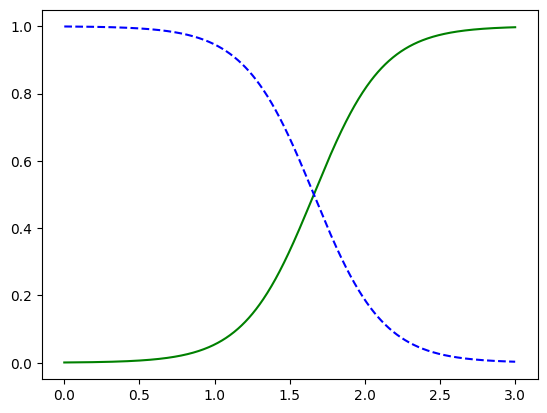

In [30]:
# 꽃잎의 너비가 0~3cm인 꽃에 대한 모델의 추정 확률 계산
import matplotlib.pyplot as plt

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")

In [31]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

- 로지스틱 회귀 모델도 $l_{1} ,  l_{2}$ 패널티를 이용하여 규제
  - 사이킷런은 $l_{2}$ 패널티를 기본으로 사용

4.6.4. 소프트맥스 회귀
- 로지스틱 회귀 모델의 경우 여러 개의 이진 분류기를 훈련 시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화가 가능한데, 이를 소프트 맥스 회귀(다항 로지스틱 회귀)라고 부름
- 원리
  - 샘플 x가 주어지면 먼저 소프트 회귀 모델이 각 클래스 k에 대한 점수 $s_{k}(x)$를 계산하고, 해당 점수에 소프트맥스 함수를 적용하여 각 클래스의 확률을 추정
    - 각 클래스는 자신만의 파라미터 벡터 $\theta$가 존재함 -> 이를 파라미터 행렬의 행으로 저장함
  - 이렇게 샘플 x에 대하여 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률을 추정할 수 있는데, 이 함수는 각 점수에 지수 함수를 적용한 후 정규화를 진행함 (이 함수를 로짓, 로그-오즈 라고 부름)
- 로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률이 가장 높은 클래스를 선택함
- 소프트맥스 회귀 분류기는 한번에 하나의 클래스만 예측 -> 다중 클래스이지 다중 출력이 아님!
- 소프트맥스 함수의 훈련 방법
  - 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목적이기 때문에, 크로스 엔트로피(cross entropy) 비용함수를 최소화하는 방법을 이용
    - 크로스 엔트로피 비용 함수의 최소화: 타깃 클래스에 대해 낮은 확률을 예측하는 모델  -> 이를 억제하면 목적에 부합
  - 각 클래스별 그레디언트 벡터를 계산한 후, 최종적으로 비용함수를 최소화하기 위한 파라미터 행렬을 찾기 위하여 경사하강법을 이용
    - 로지스틱 회귀는 클래스가 둘 이상인 경우 기본적으로 일대다(OvA)전략을 사용
    - 붓꽃 데이터를 이용한 경사하강법 예시  

In [34]:
X = iris["data"][:,(2,3)]   # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [35]:
softmax_reg.predict([[5,2]])

array([2])

In [36]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])

- 이렇게 만들어진 결정 경계를 배경색으로 구분하여 나타내면 클래스 사이의 결정 경계가 모두 선형으로 나타나는 것을 확인 가능
  - Iris-Versicolor 클래스에 대한 확률을 곡선으로 나타냄
  - 모든 결정 경계가 만나는 지점에서는 모든 클래스가 동일하게 33% 추정확률을 가지는 것과 같이 모델이 추정확률 50% 이하인 클래스를 예측할 수 있다는 점을 고려해야 함